### Group prediction with meta-estimators (1/3)

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklego.datasets import load_chicken
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklego.preprocessing import ColumnSelector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
df =load_chicken(as_frame=True)
df.sample(10)

,weight,time,chick,diet
491,188,14,43,4
171,68,8,15,1
243,167,21,22,2
259,74,6,24,2
252,145,16,23,2
438,61,4,39,3
26,55,4,3,1
367,77,6,33,3
385,294,18,34,3
222,62,4,21,2


In [4]:
feature_pipeline = Pipeline([
    ('datagrap',FeatureUnion([
        ('discrete',Pipeline([
            ('grab',ColumnSelector('diet')),
            ('encode',OneHotEncoder())
        ])),
        ("continuous",Pipeline([
            ('grab',ColumnSelector("time")),
            ('StandardScaler',StandardScaler())
        ]))
    ]))
])

pipe =Pipeline([
    ("transform",feature_pipeline),
    ("model", LogisticRegression())
])


plot_model(pipe)

NameError: name 'plot_model' is not defined

In [15]:
def plot_model(model):
    df = load_chicken(as_frame=True)

    model.fit(df[['diet','time']],df['weight'])
    metric_df =df[['diet','time','weight']].assign(pred =lambda df:model.predict(df[['diet','time']]))
    print( metric_df)
    print( metric_df.shape)

    metric =mean_absolute_error(metric_df['weight'],metric_df['pred'])
    plt.figure(figsize=(12,4))

    for i in [1,2,3,4]:
        pltr =metric_df[['time','diet','pred']].drop_duplicates().loc[lambda df:df['diet']== i]
        print(pltr.head())
        print(pltr.shape)
        plt.plot(pltr['time'],pltr['pred'],color='.rbgy'[i])
    plt.title(f"linear Model per group, MAE: {np.round(metric,2)}");

     diet  time  weight  pred
0       1     0      42    41
1       1     2      51    41
2       1     4      59    49
3       1     6      64    49
4       1     8      76    51
..    ...   ...     ...   ...
573     4    14     175   184
574     4    16     205   184
575     4    18     234   184
576     4    20     264   157
577     4    21     264   205

[578 rows x 4 columns]
(578, 4)
   time  diet  pred
0     0     1    41
1     2     1    41
2     4     1    49
3     6     1    49
4     8     1    51
(12, 3)
     time  diet  pred
220     0     2    42
221     2     2    42
222     4     2    48
223     6     2    74
224     8     2    74
(12, 3)
     time  diet  pred
340     0     3    41
341     2     3    41
342     4     3    41
343     6     3    61
344     8     3    61
(12, 3)
     time  diet  pred
460     0     4    42
461     2     4    42
462     4     4    42
463     6     4    62
464     8     4   103
(12, 3)


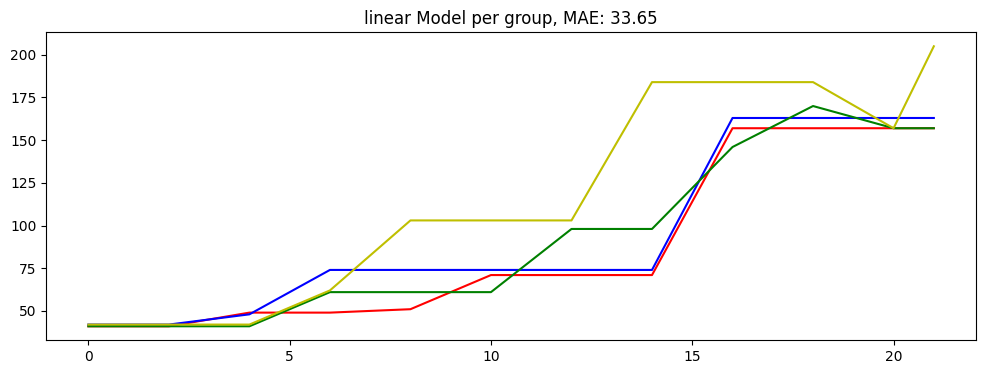

In [16]:
plot_model(pipe)

### Group prediction with meta-estimators (1/2)

### GroupedPredictor sklego

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

     diet  time  weight  pred
0       1     0      42    41
1       1     2      51    49
2       1     4      59    49
3       1     6      64    51
4       1     8      76    71
..    ...   ...     ...   ...
573     4    14     175   184
574     4    16     205   184
575     4    18     234   199
576     4    20     264   199
577     4    21     264   199

[578 rows x 4 columns]
(578, 4)
   time  diet  pred
0     0     1    41
1     2     1    49
2     4     1    49
3     6     1    51
4     8     1    71
(12, 3)
     time  diet  pred
220     0     2    42
221     2     2    48
222     4     2    58
223     6     2    73
224     8     2    74
(12, 3)
     time  diet  pred
340     0     3    41
341     2     3    49
342     4     3    61
343     6     3    61
344     8     3   107
(12, 3)
     time  diet  pred
460     0     4    42
461     2     4    50
462     4     4    62
463     6     4   103
464     8     4   103
(12, 3)


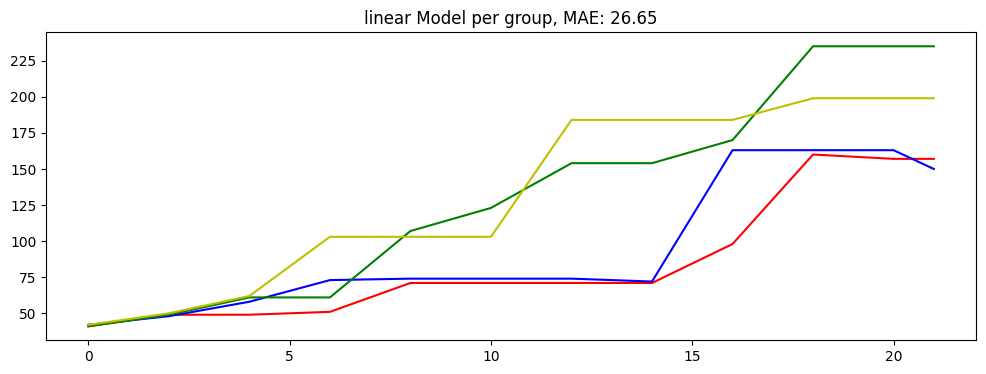

In [20]:
from sklego.meta import GroupedPredictor
mod1 = GroupedPredictor(LogisticRegression(),groups=['diet'])

plot_model(mod1)

### Zero Inflated Regressor Meta-estimators

In [33]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import  LogisticRegression , Ridge 
from sklearn.model_selection import cross_val_score 
from sklego.meta import ZeroInflatedRegressor 

df =(pd.DataFrame({'dt': pd.date_range("2018-01-01","2021-01-01")})
    .assign(x=lambda df: np.random.normal(0,1 ,df.shape[0]))
    .assign(weekend =lambda d:(df['dt'].dt.weekend >=5).astype(np.int16))
    .assign(y=lambda df: np.where(df['weekend'], 0 , 1.5  + 0.87 * df['x'] + np.random.normal( 0, 0.2 ,df.shape[0])))
)

KeyError: 'dt'

In [ ]:
df.tail()